In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

In [3]:
#LOADING DATA
from google.colab import files
uploaded = files.upload()

Saving CPD for rpm and colab.xlsx to CPD for rpm and colab.xlsx


In [4]:
#READ DATA
df = pd.read_excel(io.BytesIO(uploaded['CPD for rpm and colab.xlsx']))

In [5]:
df = df.replace({"Klasifikasi":  {"PBP":1,"KAP":2, "CPD":3}})
df = df.replace({"TajukLatihan":  {"FORUM BULAN PENDIDIK I - UNIVERSITY FOR SOCIETY":1,"FORUM BULAN PENDIDIK II - KECEMERLANGAN PERTANIAN MELAHIRKAN USAHAWAN":2, "KURSUS ASAS PENGAJARAN (KAP) SIRI 1/2020":3, "KURSUS CREATING INTERACTIVE CONTENT WITH H5P":4, "KURSUS ASAS PENGAJARAN (KAP) SIRI 2/2020":5, "KURSUS DEVELOPING WINNING TEACHING E-PORTFOLIO FOR ACADEMICS":6, "KURSUS EDUCATIONAL RESEARCH DESIGN":7, "KURSUS PUTRABLAST V3.8 (SIRI 1 - FK & FRSB)":8,"KURSUS PUTRABLAST V3.8 (SIRI 2 - FBMK & FSKTM)":9,"KURSUS PUTRABLAST V3.8 (SIRI 3 - FEP & FPP)":10,"KURSUS PUTRABLAST V3.8 (SIRI 4 - FEM & FS)":11,"KURSUS PUTRABLAST V3.8 (SIRI 5 - FBSB & FSTM)":12,"KURSUS PUTRABLAST V3.8 (SIRI 6 - FH & FPAS)":13,"KURSUS PUTRABLAST V3.8 (SIRI 7 - FP & FBMK)":14,"KURSUS SISTEM PUTRABLAST V3.8 (SIRI 8 - FPSK & FPV)":15,"KURSUS SISTEM PUTRABLAST V3.8 (SIRI 9 - FSPM, UPMKB)":16,"KURSUS VISUAL MESSAGE DESIGN: CRAFTING INFOGRAPHICS FOR PRESENTATIONS":17,"MAJLIS PERASMIAN & ASPIRASI NC SEMPENA BULAN PENDIDIK UPM 2020":18,"PERTANDINGAN AMALAN TERBAIK INOVASI P&P ANTARA FAKULTI/ PUSAT PENGAJIAN UPM 2020":19,"PUTRAFLEX: KURIKULUM FLEKSIBEL UPM":20, "SESI PERKONGSIAN AMALAN TERBAIK PELAKSANAAN PUTRAMOOC":21, "SESI PERKONGSIAN AMALAN TERBAIK SULAM@UPM":22, "SESI PERKONGSIAN INOVASI P&P DARIPADA PENYELIDIKAN GIPP":23, "WACANA - INSTRUCTIONAL LEADERSHIP OF HIGHER EDUCATION TEACHING AND LEARNING & MAJLIS PENUTUPAN BULAN PENDIDIK UPM 2020":24, "WEBINAR - REIMAGINE AND REDESIGN ONLINE LEARNING EXPERIENCE":25}})
df = df.replace({"Tempat Latihan":  {"BILIK LATIHAN EXA, IDEC ALPHA, PUTRA INFOPORT, UPM":1,"DEWAN SEMINAR AL-FARABI, FEM, UPM":2, "MAKMAL D ICT, UPMKB":3, "PLATFORM DALAM TALIAN: ZOOM & YOUTUBE":4, "PLATFORM DALAM TALIAN: ZOOM MEETING":5, "PUTRA LEARNING SPACE (PLS), CADE, UPM":6}})
df = df.replace({"Jabatan":  {"BAHAGIAN HAL EHWAL PELAJAR":1,"FAKULTI BAHASA MODEN DAN KOMUNIKASI":2, "FAKULTI BIOTEKNOLOGI DAN SAINS BIOMOLEKUL":3,  "FAKULTI EKOLOGI MANUSIA":4,  "FAKULTI KEJURUTERAAN":5,  "FAKULTI PENGAJIAN ALAM SEKITAR":6,  "FAKULTI PENGAJIAN PENDIDIKAN":7, "FAKULTI PERHUTANAN DAN ALAM SEKITAR":8,  "FAKULTI PERTANIAN":9,  "FAKULTI PERUBATAN DAN SAINS KESIHATAN":10,  "FAKULTI PERUBATAN VETERINAR":11, "FAKULTI REKABENTUK DAN SENIBINA":12,  "FAKULTI SAINS":13,  "FAKULTI SAINS DAN TEKNOLOGI MAKANAN":14,  "FAKULTI SAINS KOMPUTER DAN TEKNOLOGI MAKLUMAT":15, "INSTITUT KAJIAN PERLADANGAN":16, "JABATAN CANSELERI":17, "JABATAN SAINS DAN TEKNOLOGI":18, "JABATAN SAINS HAIWAN DAN PERIKANAN":19, "JABATAN SAINS PERHUTANAN":20, "JABATAN SAINS SOSIAL DAN PENGURUSAN":21, "JABATAN SAINS TANAMAN":22, "PUSAT ASASI SAINS PERTANIAN":23, "PUSAT ISLAM":24,"PUSAT PEMAJUAN KOMPETENSI BAHASA":25,"PUSAT PEMBANGUNAN AKADEMIK":26,"PUSAT PEMBANGUNAN MAKLUMAT DAN KOMUNIKASI":27,"PUSAT TRANSFORMASI KOMUNITI UNIVERSITI":28,"SEKOLAH PERNIAGAAN DAN EKONOMI":29}})
df = df.replace({"Skor Klasifikasi":  {"High":1,"Middle":2, "Low":3}})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Klasifikasi       1318 non-null   int64  
 1   TajukLatihan      1318 non-null   int64  
 2   Tempat Latihan    1318 non-null   int64  
 3   Jumlah Jam        1318 non-null   int64  
 4   Jabatan           1318 non-null   int64  
 5   SkorPenilaian     1318 non-null   float64
 6   Skor Klasifikasi  1318 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 72.2 KB


In [7]:
#Lets split the data into train and test set
X = df[['Klasifikasi','TajukLatihan','Tempat Latihan','Jumlah Jam','Jabatan' ]]
y = df['Skor Klasifikasi']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

In [9]:
#import the classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**DECISION TREE**

In [10]:
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
mod_dt.fit(X_train,y_train)
y_pred=mod_dt.predict(X_test)
print('Decision Tree:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))


Decision Tree:
Accuracy = 89.27%


**TUNING**

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

std_slc = StandardScaler()
pca = decomposition.PCA()
mod_dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('mod_dt', mod_dt)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      mod_dt__criterion=criterion,
                      mod_dt__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('mod_dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               

In [16]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['mod_dt__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['mod_dt__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['mod_dt'])

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 5

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [17]:
mod_dt = DecisionTreeClassifier(max_depth = 6, random_state = 1, criterion="gini")
mod_dt.fit(X_train,y_train)
y_pred=mod_dt.predict(X_test)
print('Decision Tree:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Decision Tree:
Accuracy = 97.18%


**RANDOM FOREST**

In [22]:
from sklearn.ensemble import RandomForestClassifier
RandomF = RandomForestClassifier(max_depth = 2, random_state = 1)
RandomF.fit(X_train, y_train)
y_pred = RandomF.predict(X_test)
print('Random Forest Model:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Random Forest Model:
Accuracy = 94.47%


**TUNING**

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

std_slc = StandardScaler()
pca = decomposition.PCA()
RandomF = RandomForestClassifier(max_depth = 2, random_state = 1)

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('RandomF', RandomF)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                      RandomF__criterion=criterion,
                      RandomF__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('RandomF',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               cl

In [24]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['RandomF__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['RandomF__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['RandomF'])

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [34]:
RandomF = RandomForestClassifier(max_depth = 4, random_state = 1, criterion="gini")
RandomF.fit(X_train,y_train)
y_pred=RandomF.predict(X_test)
print('Random Forest:')
print("Accuracy = {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Random Forest:
Accuracy = 96.32%


**COMPARE**

In [30]:
#Lets compare several machine learning models

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn (on training set)
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

CART: 1.000000 (0.000000)
RF: 1.000000 (0.000000)


In [31]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[653   0   0]
 [  0 186   0]
 [  0   0  84]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       653
           2       1.00      1.00      1.00       186
           3       1.00      1.00      1.00        84

    accuracy                           1.00       923
   macro avg       1.00      1.00      1.00       923
weighted avg       1.00      1.00      1.00       923



**VISUALIZATION**

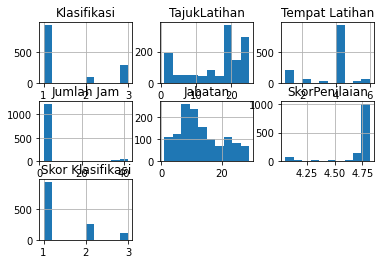

In [18]:
# histograms
df.hist()
plt.show()

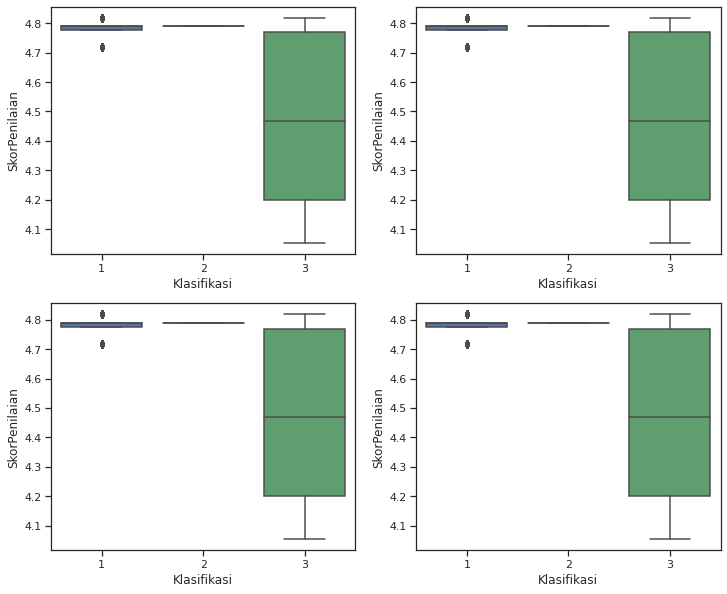

In [19]:
#lets visualize the boxplot using Seaborn library
# Box plot, also known as a box and whisker plot, displays a summary of a large amount of data 
# in five numbers — minimum, lower quartile(25th percentile), median(50th percentile), upper quartile(75th percentile) 
# and maximum data values.

sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Klasifikasi',y='SkorPenilaian',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Klasifikasi',y='SkorPenilaian',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Klasifikasi',y='SkorPenilaian',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Klasifikasi',y='SkorPenilaian',data=df)
plt.show()

# **CLUSTERING**

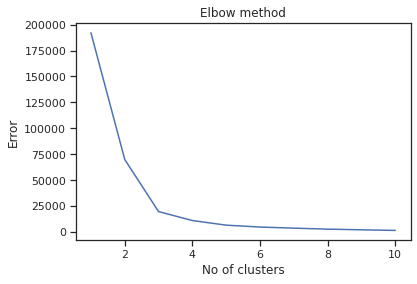

In [32]:
x = df.iloc[:, [0, 1, 2, 3]].values

#USING ELBOW METHOD to identify the best k-value
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [33]:
#let us predict using kmeans=3
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 ... 2 2 2]


array([[ 1.22757112, 20.64442013,  3.8107221 ,  2.3238512 ],
       [ 2.        ,  3.65934066,  2.98901099, 38.03296703],
       [ 2.17891374,  6.03833866,  2.91373802,  2.8370607 ]])

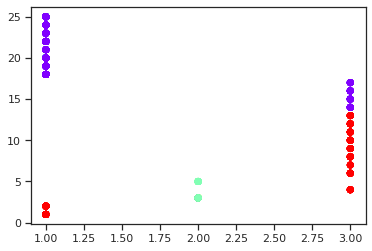

In [35]:
#visualizing clustering
plt.scatter(x[:,0], x[:,1],c=y_kmeans3, cmap='rainbow')